## Stopping power in compounds

The Bethe Bloch formula can be used on compounds using the Bragg Additivity Rule. This rule assumes that a compound can be approximated as  layers of the constituent elements. In that case:

$$
S = \Sigma w_j S
$$

with $w_j$ the fraction by weight of the *j*th element. 


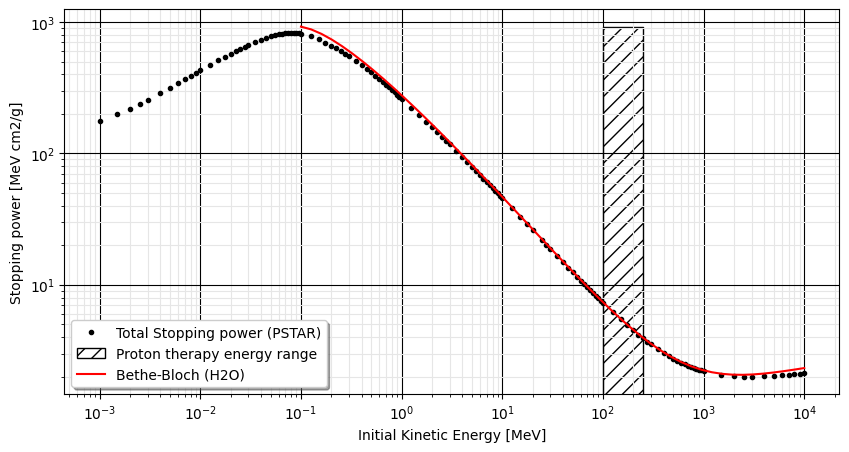

In [4]:
from protonic import bethebloch, PSTAR, compounds, projectiles
from matplotlib import pyplot as plt
import numpy as np

data = PSTAR("H2Oliquid")

fig, ax = plt.subplots(1, figsize=(10,5))

ax.plot(data.T[0], data.T[3], '.k', label="Total Stopping power (PSTAR)")

# Plot proton therapy application range
ax.fill_betweenx([0, 1.1*max(data.T[3])], 100, 250, 
                 hatch="//",
                 edgecolor='k', 
                 facecolor="white", 
                 label="Proton therapy energy range")

x = np.logspace(-1, 4)
ax.plot(x, bethebloch(x, compounds.get("H2O"), projectiles.get("proton")), '-', color='r', label='Bethe-Bloch (H2O)')

ax.set_ylabel("S [MeV cm^2 / g ]")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Initial Kinetic Energy [MeV]')
ax.set_ylabel('Stopping power [MeV cm2/g]')

ax.grid(visible=True, which='major', color='k')
ax.grid(visible=True, which='minor', color=[0.9]*3)


ax.legend(facecolor='w', framealpha=1, shadow=True)
